 ## <a id='0'> **ANÁLISIS EXPLORATORIO DE DATOS (EDA) - NFL 🏈** </a>
##### *THE BRIDGE - DATA SCIENCE 2023*
 <a id='0'> 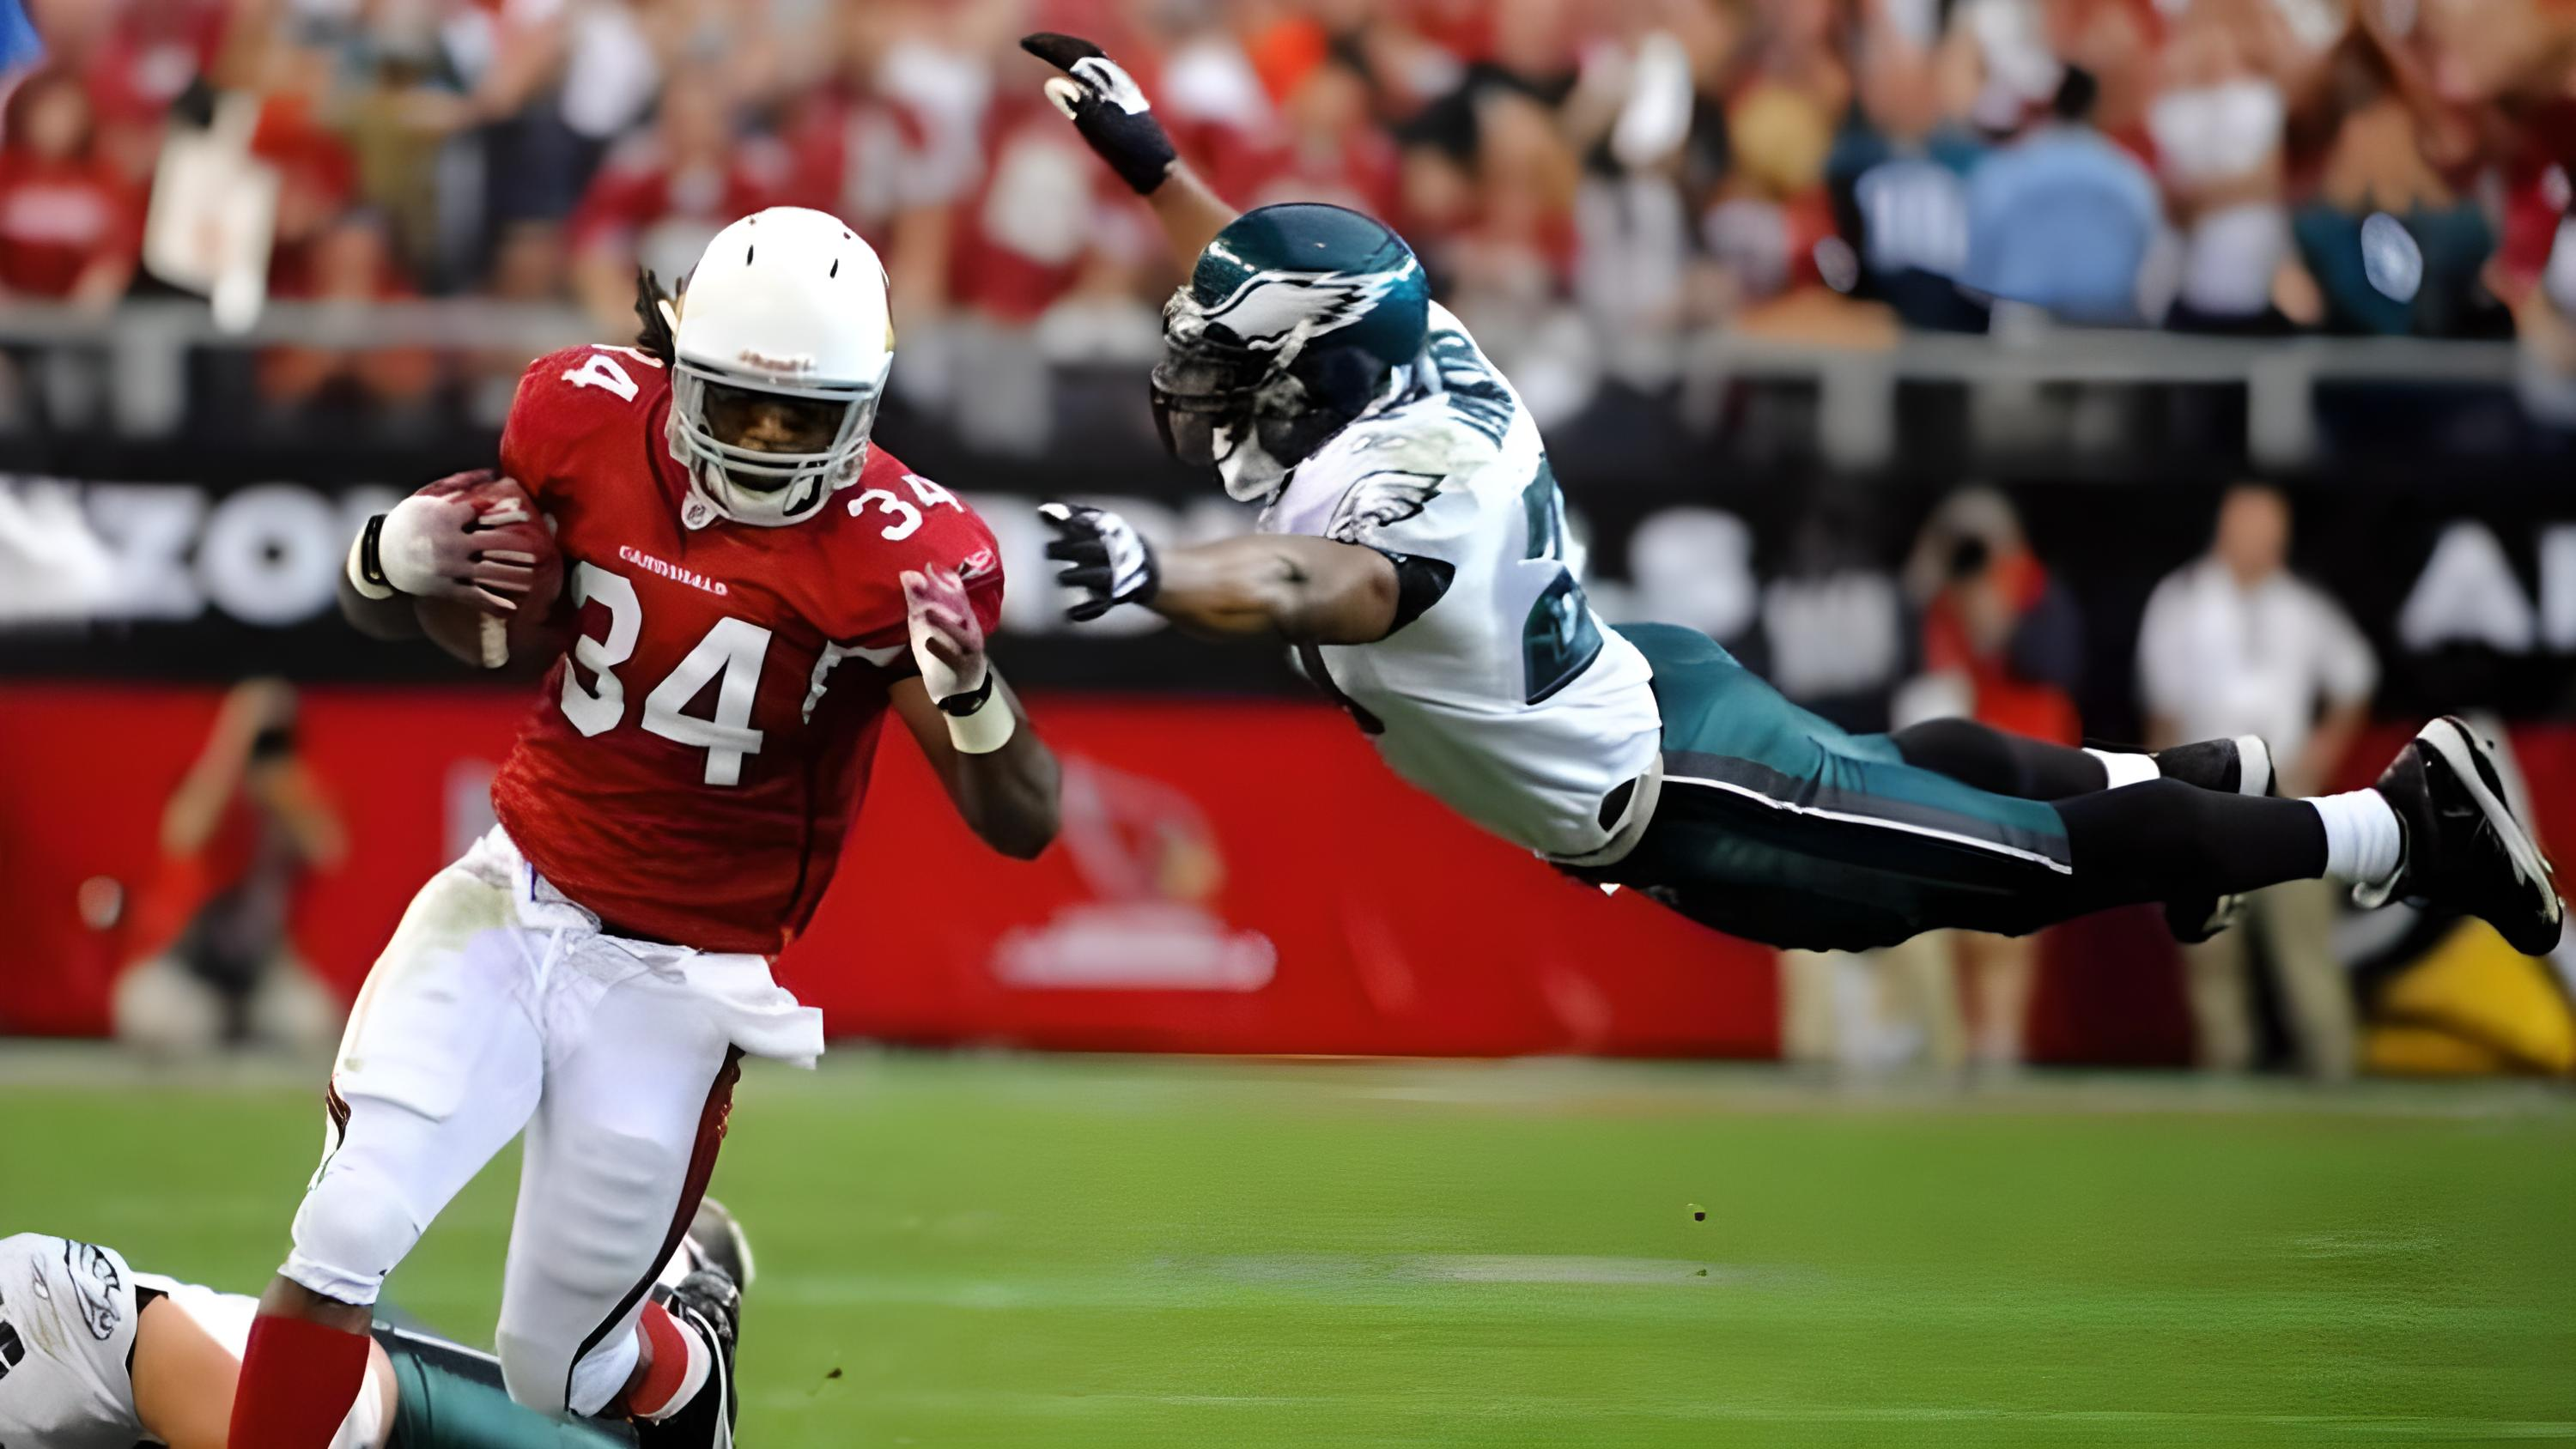</h1>

## **Índice**
---
1. [Introducción](#1)  
2. [Objetivo](#2)
3. [Hipótesis](#3)
4. [Tratamiento de datos](#)
    1. [Fuentes](#)
    2. [Librerias](#41) 
    3. [Importación de bases de datos](#)
    4. [Depuración de bases de datos](#)
    5. [DataFrame final](#)
5. [Análisis estadístico](#)
    1. [Análisis univariante](#)
    2. [Análisis bivariante y multivariante](#)
6. [Hipótesis](#)
    1. [Resumen](#)
7. [Conclusiones](#6)

-----
### *Contacto*: 
- Aquí podrás encontrar mi perfil personal: [LinkedIn](https://www.linkedin.com/in/ivancorderoc/) 
- Para dudas y consultas:   [Gmail](ivan.corderocueva@gmail.com) 
-  Mi baúl con todos mis proyectos:  [GitHub](https://github.com/ivancorderoc) 
-----

## <a id='1'>**1. Introducción**</a>

#### Este estudio se ha realizado gracias a una libreria dedica a la NFL y a Wikipedia.

Desde hace más de 10 años, las miradas se centran en una noche muy especial para más de 250 jóvenes que buscan el éxito de la mano del deporte. ¿Su objetivo? Obtener un puesto en uno de los 32 equipos que conforman la NFL, y la noche del "draft" les brinda esa oportunidad.

Este análisis se enfoca no solo en aquellos "rookies", sino también en veteranos que, a pesar de los golpes, siguen buscando prestigio eterno.

Aproximadamente, unos 1700 jugadores forman parte de la NFL, con distintos estatus, durante la temporada que se extiende desde septiembre hasta enero. Si analizamos el rendimiento, vemos que solo un selecto grupo de 100 jugadores logra situarse entre los mejores según los rankings elaborados por la propia NFL.

Este número representa aproximadamente un 5.88% del total de jugadores en la liga. ¿Estos 100 jugadores logran mantenerse consistentemente en el top 100 año tras año? Esta premisa es la piedra angular del siguiente análisis. ¿Existe una correlación directa entre las lesiones y el éxito continuo a lo largo del tiempo? Y, lo más crucial, ¿qué tan valioso resulta este éxito sostenido en el tiempo?

## <a id='2'>**2. Objetivo**</a>

La idea fundamental del proyecto es dilucidar si el estar sano influye significativamente en el éxito del jugador. Así como también, si a pesar de esas lesiones, su grado de desempeño en el campo le permite ser un jugador referente.

 ## <a id='3'> **3. Hipótesis.** </a>

1.  **¿En qué época del año los jugadores se lesionan más?**
2.  **¿Cuál es la posición más lesiva?**
3.  **¿Quienes son los jugadores que más se han lesionado?**
4.  **¿Cuáles son las lesiones más habituales?**
5.  **¿Cuáles son los equipos que más lesiones ha tenido?**
6.  **¿Ataque, defensa o equipos especiales, quién se lesiona más?**
7.  **¿La categoría del jugador está relacionado con el tipo de lesión?**
8.  **¿Cuál ha sido, en estos 10 años, el jugador con más lesiones?**
9.  **¿Dentro del ranking lesivo hay estrellas que han estado dentro de los top 100 NFL?**
10. **¿Existe relación entre las lesiones del ataque y la defensa semanalmente?**
11. **¿Cual es la relación entre el éxito y las lesiones de la carrera de un jugador?**


## <a id='3'>**4. Tratamiento de datos**</a>

### <a id='4'>**4.1 Fuentes**</a>
- Datasets: injuries: [Libreria NFL]("https://pypi.org/project/nfl-data-py/"), [Wikipedia]("https://en.wikipedia.org/wiki/NFL_Top_100")

### <a id='6'> **4.2 Librerias.** </a>

In [555]:
import utils.functions as f
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
from scipy.stats import chi2_contingency
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### <a id='7'> **4.3 Importación de bases de datos.** </a>

In [556]:
# Asignamos variables a los datasets con los que vamos a trabajar.
ranks_nfl = pd.read_csv("./data/processed/ranks_nfl.csv")
injuries = pd.read_csv("./data/processed/injuries.csv")

In [557]:
ranks_nfl.head(10)

,Rank,Player,Position,2010 Team,2011 Team,Reference,Year,2012 Team,Rank Change,2013 Team,2014 Team,2015 Team,2015 team,2016 team,Rank change,2017 team,Year accomplishments,2018 team,2019 team,2020 team
0,1,Tom Brady,Quarterback,New England Patriots,NaN,1.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Peyton Manning,Quarterback,Indianapolis Colts,NaN,2.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Adrian Peterson,Running back,Minnesota Vikings,NaN,3.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Ray Lewis,Linebacker,Baltimore Ravens,NaN,4.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Ed Reed,Safety,Baltimore Ravens,NaN,5.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Troy Polamalu,Safety,Pittsburgh Steelers,NaN,6.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Andre Johnson,Wide receiver,Houston Texans,NaN,7.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Darrelle Revis,Cornerback,New York Jets,NaN,8.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Drew Brees,Quarterback,New Orleans Saints,NaN,9.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Julius Peppers,Defensive end,Chicago Bears,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [558]:
# Vemos la informacion que nos da el primer dataset
print(ranks_nfl.shape)
print(ranks_nfl.info())

(1000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  1000 non-null   int64  
 1   Player                1000 non-null   object 
 2   Position              1000 non-null   object 
 3   2010 Team             100 non-null    object 
 4   2011 Team             108 non-null    object 
 5   Reference             974 non-null    object 
 6   Year                  1000 non-null   float64
 7   2012 Team             105 non-null    object 
 8   Rank Change           400 non-null    object 
 9   2013 Team             111 non-null    object 
 10  2014 Team             106 non-null    object 
 11  2015 Team             9 non-null      object 
 12  2015 team             100 non-null    object 
 13  2016 team             105 non-null    object 
 14  Rank change           500 non-null    object 
 15  2017 team  

In [559]:
# Vemos los unicos de cada columna
print(ranks_nfl.nunique())

Rank                    100
Player                  403
Position                 20
2010 Team                30
2011 Team                34
Reference               274
Year                     10
2012 Team                32
Rank Change              68
2013 Team                33
2014 Team                31
2015 Team                 8
2015 team                32
2016 team                30
Rank change              68
2017 team                29
Year accomplishments    303
2018 team                32
2019 team                33
2020 team                14
dtype: int64


In [560]:
injuries.head(10)

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2010.0,REG,ARI,1.0,00-0027007,RB,Chris Wells,Chris,Wells,Knee,NaN,Questionable,Knee,NaN,Did Not Participate In Practice,2010-09-10 12:13:53
1,2010.0,REG,ARI,1.0,00-0022288,RB,Jason Wright,Jason,Wright,Toe,NaN,Questionable,Toe,NaN,Limited Participation in Practice,2010-09-10 12:13:44
2,2010.0,REG,ARI,1.0,00-0025668,CB,Michael Adams,Michael,Adams,Shoulder,NaN,Probable,Shoulder,NaN,Full Participation in Practice,NaN
3,2010.0,REG,ARI,1.0,00-0026939,LB,Will Davis,Will,Davis,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
4,2010.0,REG,ARI,1.0,00-0022921,WR,Larry Fitzgerald,Larry,Fitzgerald,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
5,2010.0,REG,ARI,1.0,00-0025602,TE,Ben Patrick,Ben,Patrick,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
6,2010.0,REG,ARI,1.0,00-0013126,LB,Joey Porter,Joey,Porter,Back,NaN,Probable,Back,NaN,Full Participation in Practice,NaN
7,2010.0,REG,ARI,1.0,00-0027691,WR,Andre Roberts,Andre,Roberts,Shoulder,NaN,Probable,Shoulder,NaN,Full Participation in Practice,NaN
8,2010.0,REG,ATL,1.0,00-0022781,WR,Michael Jenkins,Michael,Jenkins,Shoulder,NaN,Out,Shoulder,NaN,Did Not Participate In Practice,2010-09-10 12:53:27
9,2010.0,REG,ATL,1.0,00-0024183,CB,Brent Grimes,Brent,Grimes,Hip,NaN,Questionable,Hip,NaN,Full Participation in Practice,2010-09-10 12:52:50


In [561]:
# Vemos la informacion que nos da el *segundo* dataset*
print(injuries.shape)
print(injuries.info())

(51119, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51119 entries, 0 to 51118
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     51119 non-null  float64
 1   game_type                  51119 non-null  object 
 2   team                       51119 non-null  object 
 3   week                       51119 non-null  float64
 4   gsis_id                    51119 non-null  object 
 5   position                   51119 non-null  object 
 6   full_name                  51119 non-null  object 
 7   first_name                 51119 non-null  object 
 8   last_name                  51119 non-null  object 
 9   report_primary_injury      39778 non-null  object 
 10  report_secondary_injury    2145 non-null   object 
 11  report_status              39778 non-null  object 
 12  practice_primary_injury    51074 non-null  object 
 13  practice_secondary_injury  2773 no

In [562]:
# Vemos los unicos de cada columna

print(injuries.nunique())

season                          10
game_type                        5
team                            34
week                            21
gsis_id                       4470
position                        17
full_name                     4416
first_name                    1575
last_name                     2522
report_primary_injury          164
report_secondary_injury        103
report_status                    4
practice_primary_injury        194
practice_secondary_injury      130
practice_status                  5
date_modified                31553
dtype: int64


### <a id='8'> **4.4 Depuración de bases de datos.** </a>

- #### *Primer dataset:*

In [563]:
# Eliminamos todas las columnas innecesarias y las organizamos.

ranks_nfl = ranks_nfl.reindex(columns=["Rank", "Player", "Position", "Year"])

In [564]:
def columns_lower(df):
    df.columns = df.columns.str.lower()
    return df

columns_lower(ranks_nfl)
ranks_nfl.columns

Index(['rank', 'player', 'position', 'year'], dtype='object')

In [565]:
ranks_nfl

,rank,player,position,year
0,1,Tom Brady,Quarterback,2010.0
1,2,Peyton Manning,Quarterback,2010.0
2,3,Adrian Peterson,Running back,2010.0
3,4,Ray Lewis,Linebacker,2010.0
4,5,Ed Reed,Safety,2010.0
...,...,...,...,...
995,96,Chris Carson,Running back,2019.0
996,97,Budda Baker,Safety,2019.0
997,98,Brandon Brooks,Guard,2019.0
998,99,Darren Waller,Tight end,2019.0


In [566]:
# Cambiamos los nombres en nuestra columna "Position"

ranks_nfl["position"].replace({"Wide Receiver":"Wide receiver",
                              "Fullback":"Running back",
                              "Strong safety":"Safety",
                              "Free safety":"Safety",
                              "Outside linebacker":"Linebacker",
                              "Offensive Tackle" :"Offensive tackle",
                              "Defensive Tackle":"Defensive tackle"}, inplace=True)

In [567]:
def float_int(dataframe, columns):
    for column in columns:
        if column not in dataframe.columns:
            print(f"La columna '{column}' no existe en el DataFrame.")
        else:
            dataframe[column] = dataframe[column].astype(int)

In [568]:
float_int(ranks_nfl, ["rank", "year"])

-   #### *Segundo dataset:*

In [569]:
injuries.head(1)

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2010.0,REG,ARI,1.0,00-0027007,RB,Chris Wells,Chris,Wells,Knee,NaN,Questionable,Knee,NaN,Did Not Participate In Practice,2010-09-10 12:13:53


In [570]:
# Procedemos a eliminar columnas que no son importantes y de paso estandarizamos los nombres de las columnas
injuries.drop(columns=["gsis_id", 
                       "first_name",
                       "last_name",
                       "report_secondary_injury",
                       "practice_secondary_injury",
                       "date_modified",
                       "practice_primary_injury"],
              inplace=True)
injuries.rename(columns={'season':'year',
                         'game_type':'season',
                         'team':'team',
                         'position':'position',
                         'full_name': 'player',
                         'week': 'week',
                         "report_primary_injury":"injury",
                         "report_status": "report_status",
                         "practice_status":"practice_status"},
                inplace=True)

In [571]:
# eliminamos los valores faltantes

injuries.dropna(inplace=True)
injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39778 entries, 0 to 51111
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             39778 non-null  float64
 1   season           39778 non-null  object 
 2   team             39778 non-null  object 
 3   week             39778 non-null  float64
 4   position         39778 non-null  object 
 5   player           39778 non-null  object 
 6   injury           39778 non-null  object 
 7   report_status    39778 non-null  object 
 8   practice_status  39778 non-null  object 
dtypes: float64(2), object(7)
memory usage: 3.0+ MB


In [572]:
# Nos centraremos en jugadores que realmente están reportados como lesionados

injuries = injuries.loc[injuries["practice_status"].isin([injuries["practice_status"].unique()[0], injuries["practice_status"].unique()[-2]])]

In [573]:
# Nuestro análisis se centrará en la temporada regular

injuries = injuries[injuries["season"].str.contains("REG")]

In [574]:
# Limpiamos la columna "Position"

injuries["position"].replace({"LB":"Linebacker",
                              "WR":"Wide receiver",
                              "CB":"Cornerback",
                              "RB":"Running back",
                              "S":"Safety",
                              "DE":"Defensive end",
                              "T":"Offensive tackle",
                              "DT":"Defensive tackle",
                              "TE": "Tight end",
                              "G": "Guard",
                              "QB":"Quarterback",
                              "C": "Center",
                              "K": "Kicker",
                              "P": "Punter",
                              "LS":"Long snapper",
                              "KR": "Kicker returner",
                              "PR":"Punt returner",}, inplace=True)


In [575]:
# Estandarizamos nuestras columnas para dejarlas en una categoría correspondiente.

injuries["injury"].replace({"left Shoulder":"Shoulder",
                                   "right Shoulder":"Shoulder",
                                   "Right Shoulder":"Shoulder",
                                   "migraines":"Migraines",
                                   "right Hand":"Hand",
                                   "(migraines)":"Migraines",
                                   "(Migraines)":"Migraines",
                                   "left Groin":"Groin",
                                   "right Groin":"Groin",
                                   "left Forearm":"Forearm",
                                   "right Knee":"Knee",
                                   "left Knee":"Knee",
                                   "Knees": "Knee",
                                   "Ankles":"Ankles",
                                   "left Ankle": "Ankles",
                                   "right Finger":"Finger",
                                   "right hip":"Hip",
                                   "Quadricep":"Quadriceps",
                                   "right Quadricep":"Quadriceps",
                                   "rt. thumb":"Thumb",
                                   "right Thumb":"Thumb",
                                   "left Calf": "Calf",
                                   "right Calf": "Calf",
                                   "groin, knee, ankle": "Multiple",
                                   'Ribs / Shoulder / Illness':"Multiple",
                                   "Shoulder, Finger": "Multiple",
                                   "Bicep":"Biceps",
                                   "right Elbow": "Elbow",
                                   "Core": "Core Muscle",
                                   "Core Muscle Injury": "Core Muscle",
                                   "Right Collarbone": "Collarbone",
                                   "Medical Illness":"Illness",
                                   "left Wrist": "Wrist",
                                   "right Hamstring":"Hamstring",
                                   "left Hamstring":"Hamstring",
                                   "Tricep":"Triceps",
                                   "right Hip":"Hip",
                                   "left Hip":"Hip",
                                   "Toe":"Toes",
                                   "Rib":"Ribs",
                                   "Lacerated Kidney":"Kidney",
                                   "non football injury":"Not Injury Related",           
                                   "right Thigh": "Thigh"}, inplace=True)


In [576]:
# Actualizamos el nombre de los equipos a fecha de hoy

injuries["team"].replace({"SD":"LAC",
                          "STL":"LA",
                          "OAK":"LV",}
                         , inplace=True)

In [577]:
# Comprobamos el estado de nuestro dataset

injuries.iloc[[7]]

,year,season,team,week,position,player,injury,report_status,practice_status
20,2010.0,REG,BUF,1.0,Linebacker,Reggie Torbor,Chest,Out,Did Not Participate In Practice


In [578]:
# Procedemos dejarlo con índice correcto

injuries.reset_index(drop=True, inplace=True)

In [579]:
#convertimos nuestras columnas en enteros
float_int(injuries, ["year", "week"])

### <a id='9'>**4.5 Dataset final**</a>

In [580]:
# dataset 1
ranks_nfl.head(3)

,rank,player,position,year
0,1,Tom Brady,Quarterback,2010
1,2,Peyton Manning,Quarterback,2010
2,3,Adrian Peterson,Running back,2010


In [581]:
# dataset 2
injuries.head(3)

,year,season,team,week,position,player,injury,report_status,practice_status
0,2010,REG,ARI,1,Running back,Chris Wells,Knee,Questionable,Did Not Participate In Practice
1,2010,REG,ATL,1,Wide receiver,Michael Jenkins,Shoulder,Out,Did Not Participate In Practice
2,2010,REG,BAL,1,Defensive tackle,Terrence Cody,Knee,Out,Out (Definitely Will Not Play)


## <a id='10'>**5. Análisis estadístico**</a>

### <a id='11'>**5.1 Análisis univariante**</a>

Como podemos observar nuestros datasets fudamentalmente se caracterizan por ser de tipo categórico. Procedemos a valorar.

-   Primer dataset dataset:

    - Univariante ordenado

count    1000.000000
mean       50.500000
std        28.880514
min         1.000000
25%        25.750000
50%        50.500000
75%        75.250000
max       100.000000
Name: rank, dtype: float64


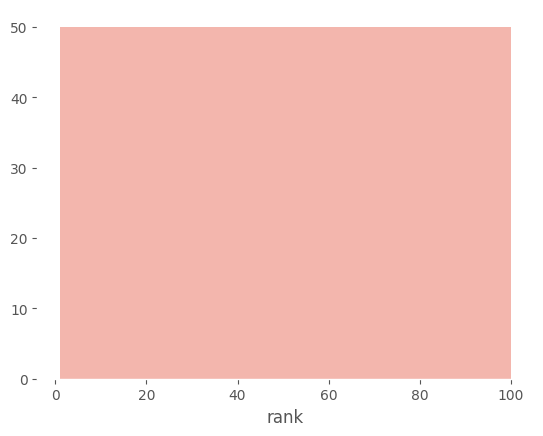

In [582]:
# Describe de cada columana para ver los la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(ranks_nfl["rank"].describe())
sns.distplot(ranks_nfl["rank"], kde=False, bins=20);

count    1000.000000
mean     2014.500000
std         2.873719
min      2010.000000
25%      2012.000000
50%      2014.500000
75%      2017.000000
max      2019.000000
Name: year, dtype: float64


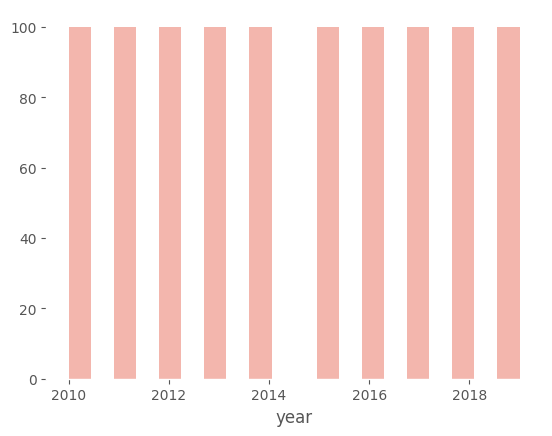

In [583]:
# Describe de cada columana para ver los la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(ranks_nfl["year"].describe())
sns.distplot(ranks_nfl["year"], kde=False, bins=20);

-   Primer dataset dataset:

    - Univariante **no** ordenado

In [584]:
# Análisis de las columnas categóricas
ranks_nfl["position"].value_counts()
ranks_nfl["position"].value_counts(normalize=True)

Wide receiver       0.166
Quarterback         0.140
Linebacker          0.134
Running back        0.111
Defensive end       0.106
Cornerback          0.078
Safety              0.062
Defensive tackle    0.062
Tight end           0.054
Offensive tackle    0.049
Guard               0.025
Center              0.012
Kicker              0.001
Name: position, dtype: float64

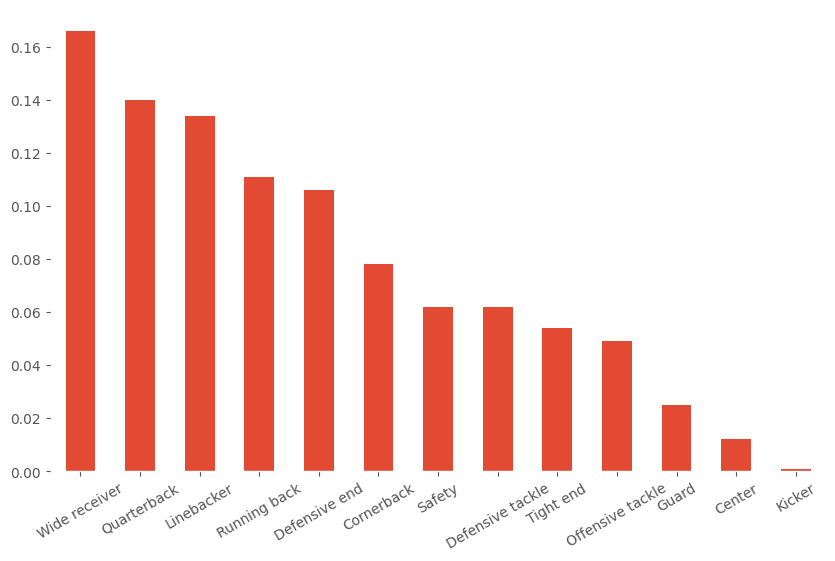

In [585]:
# Visualización de las columnas categóricas

plt.figure(figsize=(10,6))
ranks_nfl["position"].value_counts(normalize=True).head(50).plot.bar()
plt.xticks(rotation = 30);

In [586]:
# Análisis de las columnas categóricas
ranks_nfl["player"].value_counts()
ranks_nfl["player"].value_counts(normalize=True)

Tom Brady           0.010
Drew Brees          0.010
Larry Fitzgerald    0.010
Aaron Rodgers       0.010
Von Miller          0.009
                    ...  
Sammy Watkins       0.001
Richie Incognito    0.001
Mike Wallace        0.001
Donovan McNabb      0.001
Darren Waller       0.001
Name: player, Length: 403, dtype: float64

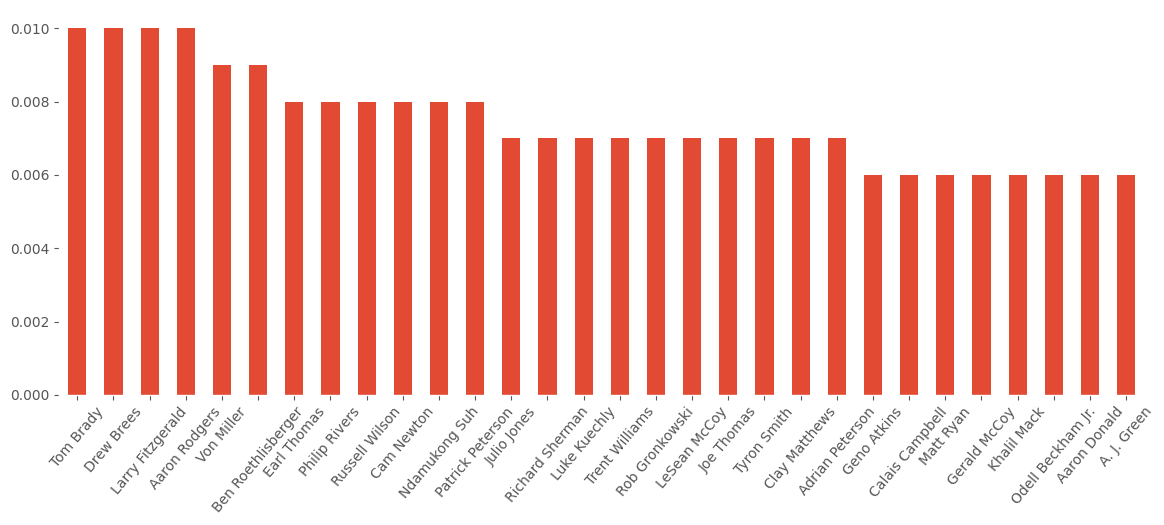

In [587]:
# Visualizacion de las columnas categóricas
plt.figure(figsize=(14,5))
ranks_nfl["player"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 50);

-   Segundo dataset dataset:

    - Univariante ordenado

count    12811.000000
mean         9.062524
std          4.840605
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         17.000000
Name: week, dtype: float64


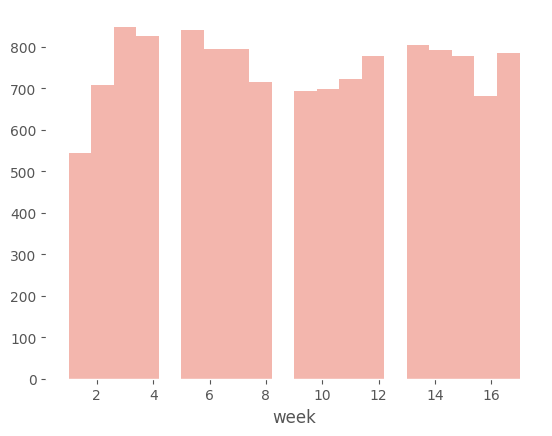

In [588]:
# Describe de cada columana para ver los la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(injuries["week"].describe())
sns.distplot(injuries["week"], kde=False, bins=20);

count    12811.000000
mean      2014.440012
std          2.858498
min       2010.000000
25%       2012.000000
50%       2014.000000
75%       2017.000000
max       2019.000000
Name: year, dtype: float64


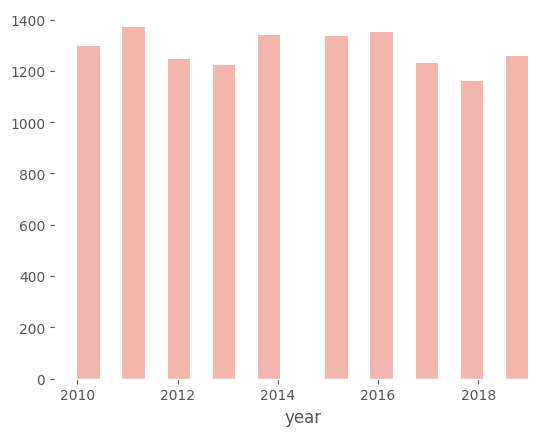

In [589]:
# Describe de cada columana para ver los la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(injuries["year"].describe())
sns.distplot(injuries["year"], kde=False, bins=20);


-   Segundo dataset dataset:

    - Univariante **no** ordenado

In [590]:
# Análisis de las columnas categóricas
print(injuries["season"].value_counts())
injuries["season"].value_counts(normalize=True)


REG    12811
Name: season, dtype: int64


REG    1.0
Name: season, dtype: float64

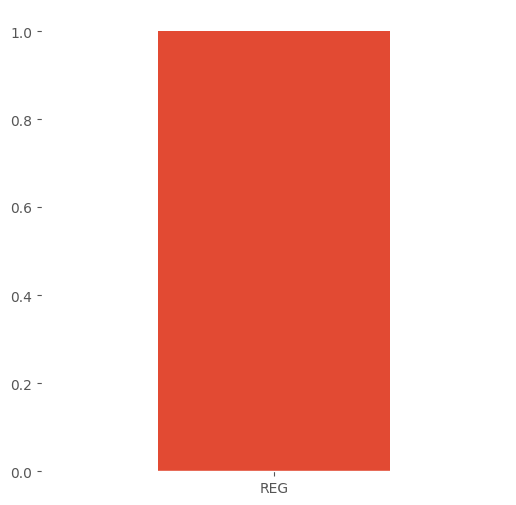

In [591]:
# Visualizacion de las columnas categóricas
plt.figure(figsize=(6,6))
injuries["season"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 0);

In [592]:
# Análisis de las columnas categóricas
print(injuries["team"].value_counts())
injuries["team"].value_counts(normalize=True)

IND    652
SEA    512
GB     511
DAL    503
NYG    484
CIN    464
LAC    459
LV     457
JAX    433
CAR    426
NO     425
NYJ    421
BUF    417
CLE    413
HOU    407
DET    404
CHI    403
BAL    395
PIT    387
TB     377
TEN    372
LA     359
WAS    358
MIN    342
DEN    329
SF     320
PHI    319
KC     309
NE     302
ARI    294
ATL    289
MIA    268
Name: team, dtype: int64


IND    0.050894
SEA    0.039966
GB     0.039888
DAL    0.039263
NYG    0.037780
CIN    0.036219
LAC    0.035829
LV     0.035672
JAX    0.033799
CAR    0.033253
NO     0.033175
NYJ    0.032862
BUF    0.032550
CLE    0.032238
HOU    0.031770
DET    0.031535
CHI    0.031457
BAL    0.030833
PIT    0.030208
TB     0.029428
TEN    0.029038
LA     0.028023
WAS    0.027945
MIN    0.026696
DEN    0.025681
SF     0.024979
PHI    0.024900
KC     0.024120
NE     0.023573
ARI    0.022949
ATL    0.022559
MIA    0.020920
Name: team, dtype: float64

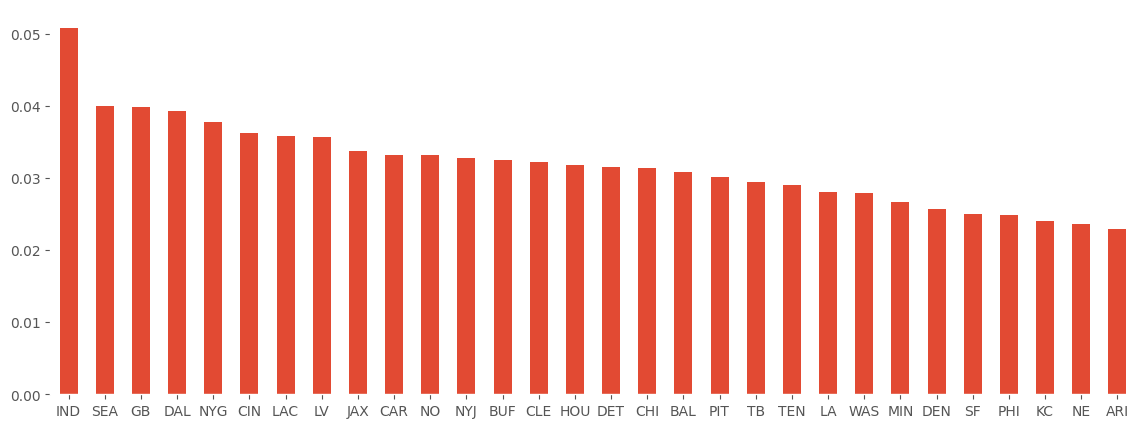

In [593]:
# Visualizacion de las columnas categóricas
plt.figure(figsize=(14,5))
injuries["team"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 0);

In [594]:
# Análisis de las columnas categóricas
print(injuries["position"].value_counts())
injuries["position"].value_counts(normalize=True)

Linebacker          1947
Cornerback          1651
Wide receiver       1615
Running back        1173
Safety              1117
Offensive tackle    1022
Defensive end       1011
Tight end            860
Defensive tackle     855
Guard                714
Quarterback          371
Center               336
Kicker                85
Punter                29
Long snapper          21
Kicker returner        3
Punt returner          1
Name: position, dtype: int64


Linebacker          0.151979
Cornerback          0.128874
Wide receiver       0.126064
Running back        0.091562
Safety              0.087191
Offensive tackle    0.079775
Defensive end       0.078917
Tight end           0.067130
Defensive tackle    0.066740
Guard               0.055733
Quarterback         0.028959
Center              0.026227
Kicker              0.006635
Punter              0.002264
Long snapper        0.001639
Kicker returner     0.000234
Punt returner       0.000078
Name: position, dtype: float64

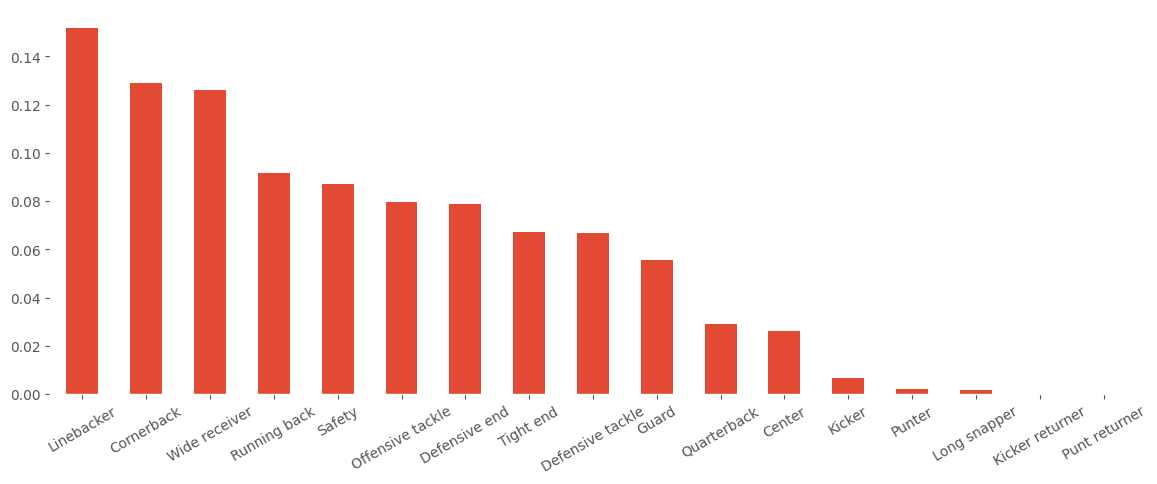

In [595]:
# Visualizacion de las columnas categóricas
plt.figure(figsize=(14,5))
injuries["position"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 30);

In [596]:
# Análisis de las columnas categóricas
print(injuries["player"].value_counts())
injuries["player"].value_counts(normalize=True)

Eddie Royal        33
Louis Delmas       31
Jordan Reed        27
Marcus Gilbert     26
A.J. Green         25
                   ..
Bobby Rainey        1
Luther Robinson     1
Jayson DiManche     1
Tramain Jacobs      1
Dwayne Haskins      1
Name: player, Length: 3118, dtype: int64


Eddie Royal        0.002576
Louis Delmas       0.002420
Jordan Reed        0.002108
Marcus Gilbert     0.002030
A.J. Green         0.001951
                     ...   
Bobby Rainey       0.000078
Luther Robinson    0.000078
Jayson DiManche    0.000078
Tramain Jacobs     0.000078
Dwayne Haskins     0.000078
Name: player, Length: 3118, dtype: float64

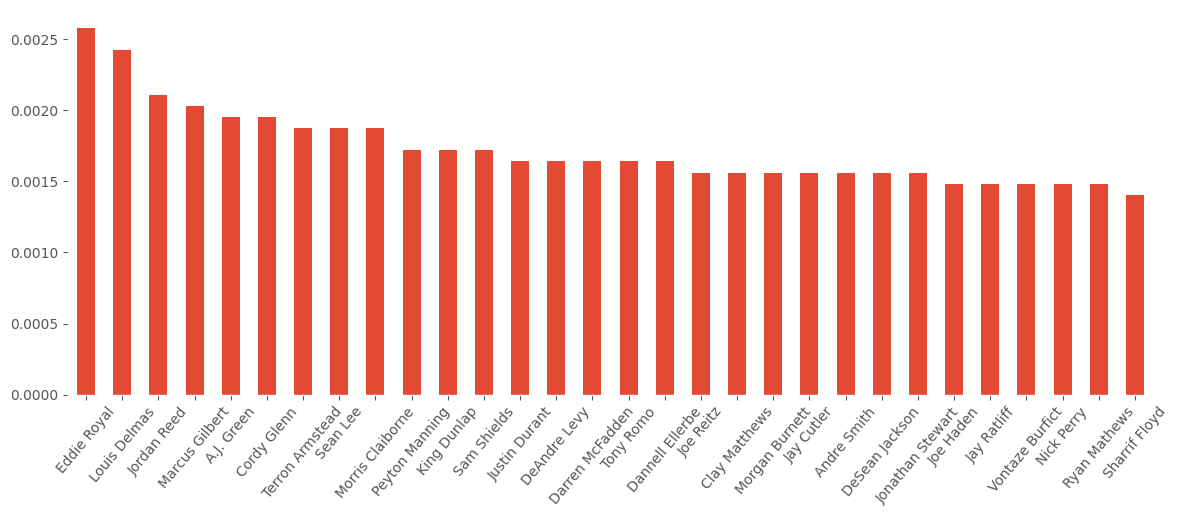

In [597]:
# Visualizacion de las columnas categóricas
plt.figure(figsize=(14,5))
injuries["player"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 50);

In [598]:
# Análisis de las columnas categóricas
print(injuries["injury"].value_counts())
injuries["injury"].value_counts(normalize=True)

Knee          2376
Ankle         1905
Hamstring     1616
Concussion     964
Foot           828
              ... 
Flu              1
Arch             1
Lumbar           1
Nose             1
Teeth            1
Name: injury, Length: 61, dtype: int64


Knee          0.185466
Ankle         0.148700
Hamstring     0.126142
Concussion    0.075248
Foot          0.064632
                ...   
Flu           0.000078
Arch          0.000078
Lumbar        0.000078
Nose          0.000078
Teeth         0.000078
Name: injury, Length: 61, dtype: float64

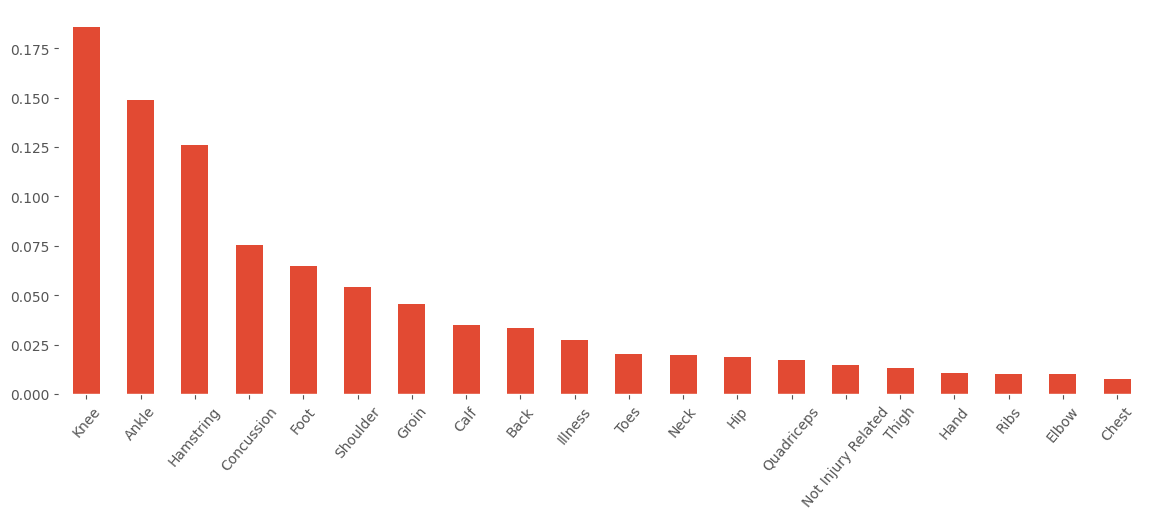

In [599]:
# Visualizacion de las columnas categóricas
plt.figure(figsize=(14,5))
injuries["injury"].value_counts(normalize=True).head(20).plot.bar()
plt.xticks(rotation = 50);

In [600]:
# Análisis de las columnas categóricas
print(injuries["report_status"].value_counts())
injuries["report_status"].value_counts(normalize=True)

Out             8449
Questionable    2346
Doubtful        1680
Probable         336
Name: report_status, dtype: int64


Out             0.659511
Questionable    0.183124
Doubtful        0.131137
Probable        0.026227
Name: report_status, dtype: float64

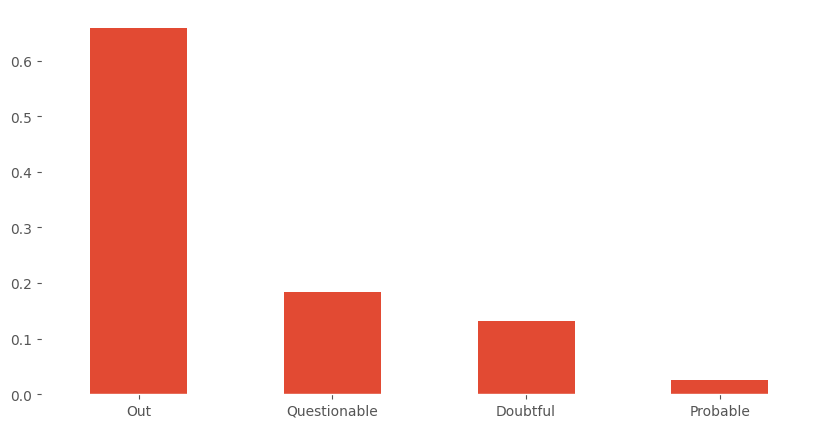

In [601]:
# Visualizacion de las columnas categóricas
plt.figure(figsize=(10,5))
injuries["report_status"].value_counts(normalize=True).head(30).plot.bar()
plt.xticks(rotation = 0);

In [602]:
# Análisis de las columnas categóricas
print(injuries["practice_status"].value_counts())
injuries["practice_status"].value_counts(normalize=True)


Did Not Participate In Practice    12122
Out (Definitely Will Not Play)       689
Name: practice_status, dtype: int64


Did Not Participate In Practice    0.946218
Out (Definitely Will Not Play)     0.053782
Name: practice_status, dtype: float64

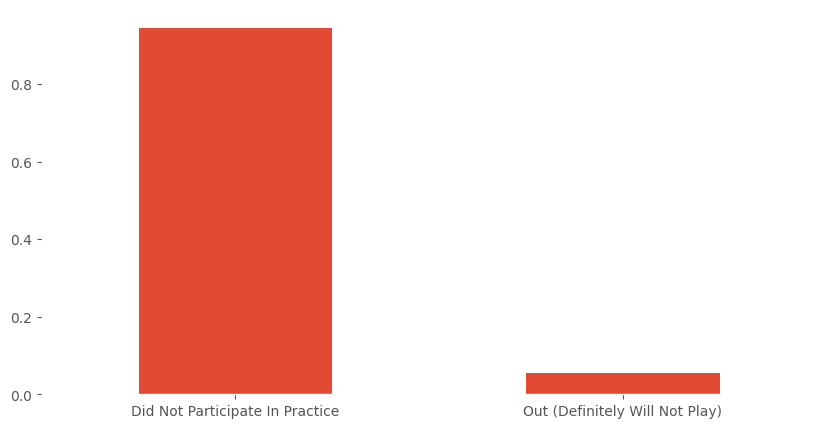

In [603]:
# Visualizacion de las columnas categóricas
plt.figure(figsize=(10,5))
injuries["practice_status"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 0);


### <a id='12'> **5.2 Análisis bivariante y multivariante.** </a>

Los Wide receiver tienen a 166 jugadores en el ranking.
Los Quarterback tienen a 140 jugadores en el ranking.
Los Linebacker tienen a 134 jugadores en el ranking.
Los Running back tienen a 111 jugadores en el ranking.
Los Defensive end tienen a 106 jugadores en el ranking.
Los Cornerback tienen a 78 jugadores en el ranking.
Los Safety tienen a 62 jugadores en el ranking.
Los Defensive tackle tienen a 62 jugadores en el ranking.
Los Tight end tienen a 54 jugadores en el ranking.
Los Offensive tackle tienen a 49 jugadores en el ranking.
Los Guard tienen a 25 jugadores en el ranking.
Los Center tienen a 12 jugadores en el ranking.
Los Kicker tienen a 1 jugadores en el ranking.


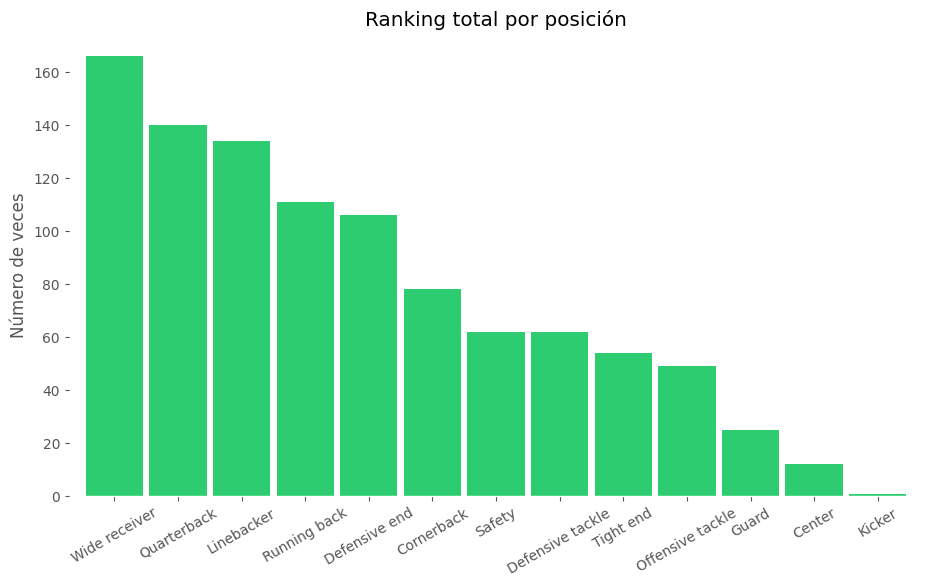

In [604]:
# Filtramos para ver la posicion que más veces aparece en el ranking nfl
pos_rank = ranks_nfl["position"].value_counts()
for position, count in pos_rank.items():
    print(f"Los {position} tienen a {count} jugadores en el ranking.")

# visualización    
plt.style.use(['ggplot', {'axes.facecolor': 'white'}])
plt.figure(figsize=(11,6))
pos_rank.plot(kind="bar",
              title= "Ranking total por posición",
              width=0.9,
              ylabel= "Número de veces",
              color="#2ecc71");
plt.xticks(rotation = 30);

-   Segundo dataset:

In [605]:
period = injuries[["week"]].value_counts().sort_index()
print(period)

week
1       544
2       708
3       849
4       826
5       840
6       796
7       796
8       716
9       693
10      698
11      723
12      779
13      804
14      794
15      778
16      682
17      785
dtype: int64


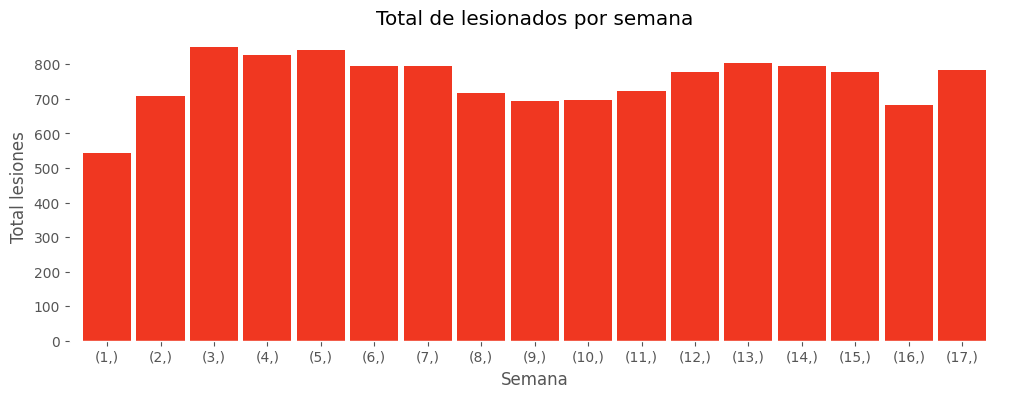

In [606]:
plt.style.use(['ggplot', {'axes.facecolor': 'white'}])
plt.figure(figsize=(12, 4))
period.plot(kind='bar', 
            title= "Total de lesionados por semana",
            ylabel= "Total lesiones",
            color="#F03721",
            xlabel = "Semana",
            width=0.9)

plt.xticks(rotation=0);

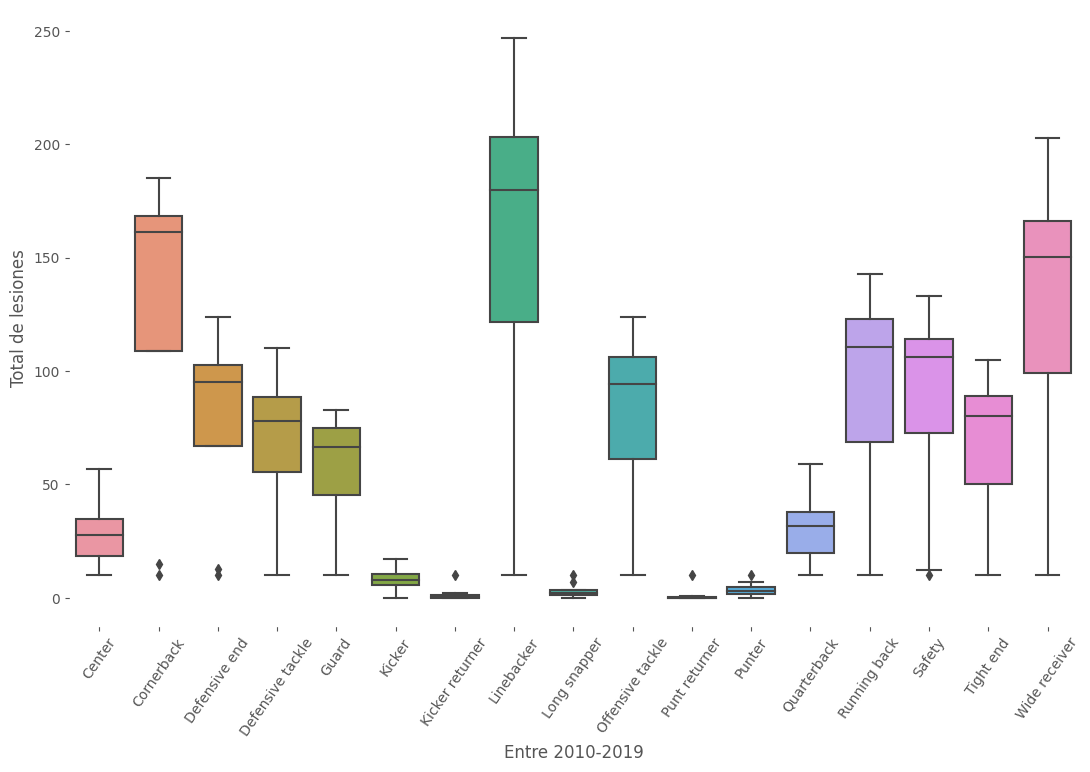

In [607]:
# dentro de las lesiones visualizamos los años y las posiciones

cross_tab = pd.crosstab(index = injuries.year, columns=injuries.position)
cross_tab_matrix = np.array(cross_tab)
describe = cross_tab.describe(include="all")
plt.figure(figsize=(13, 8))
sns.boxplot(describe)
plt.xticks(rotation=55)
plt.ylabel('Total de lesiones')
plt.xlabel('Entre 2010-2019');

In [608]:
describe = cross_tab.describe(include="all").T
describe


,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Center,10.0,33.6,11.276327,21.0,25.00,30.5,38.00,57.0
Cornerback,10.0,165.1,15.088259,140.0,157.75,165.5,177.50,185.0
Defensive end,10.0,101.1,12.810152,85.0,90.25,100.5,108.25,124.0
Defensive tackle,10.0,85.5,14.183324,69.0,75.25,80.5,97.75,110.0
Guard,10.0,71.4,10.647900,57.0,61.50,72.5,81.75,83.0
Kicker,10.0,8.5,5.212165,0.0,6.00,7.0,11.25,17.0
Kicker returner,10.0,0.3,0.674949,0.0,0.00,0.0,0.00,2.0
Linebacker,10.0,194.7,33.770632,151.0,165.25,199.5,215.00,247.0
Long snapper,10.0,2.1,2.024846,0.0,1.00,1.5,2.00,7.0


## <a id='13'>**6. Hipótesis**</a>
-   Empezamos a realizar nuestra investigación.

> ## 1. ¿En qué epoca del año los jugadores se lesionan más?

La semana con mayor número de lesiones es: 3, con un total de: 849 lesiones


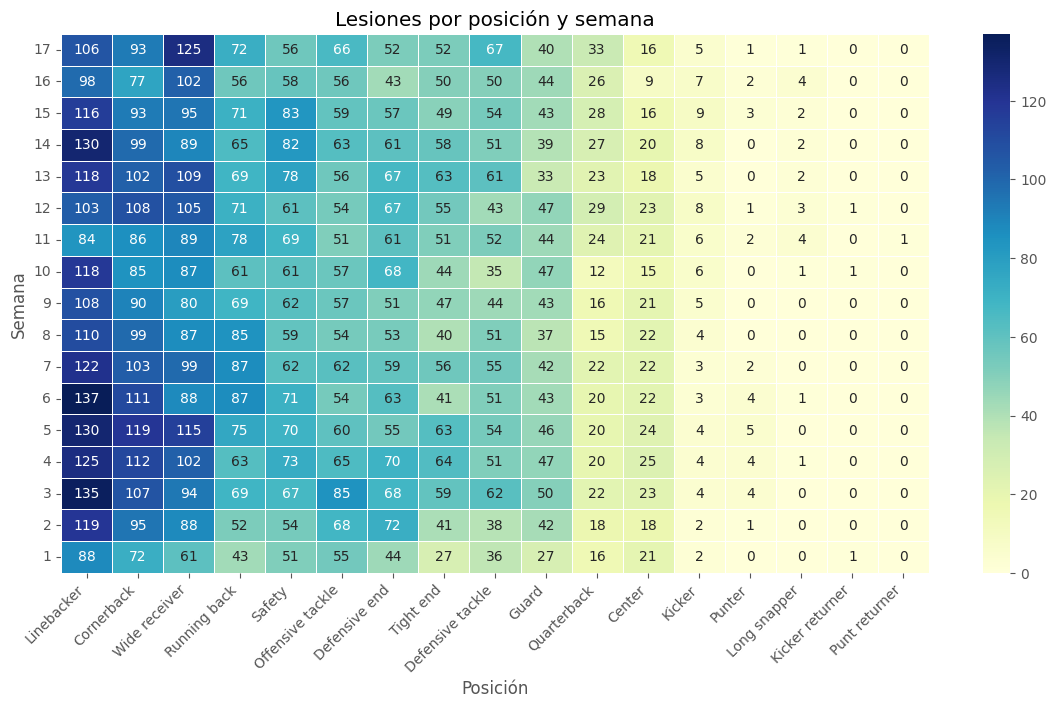

In [609]:
week_period = pd.crosstab(index=injuries.week, columns=injuries.position)

# Ordenamos las posiciones por frecuencia total
sorted_positions = week_period.sum(axis=0).sort_values(ascending=False).index
week_period = week_period[sorted_positions]

# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 7))

# Creamos un heatmap
sns.heatmap(week_period, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)

# Configuramos etiquetas y título
plt.xlabel('Posición')
plt.ylabel('Semana')
plt.title('Lesiones por posición y semana')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0, ha="right")
plt.gca().invert_yaxis()


# Imprimimos por pantalla
week_period["Total"] = week_period.sum(axis=1)
max_injury = week_period["Total"].idxmax()
max_value = week_period["Total"].max()
print(f"La semana con mayor número de lesiones es: {max_injury}, con un total de: {max_value} lesiones" );

> ## 2. ¿Cuál es la posición más lesiva?

La posición que más se lesiona es Linebacker


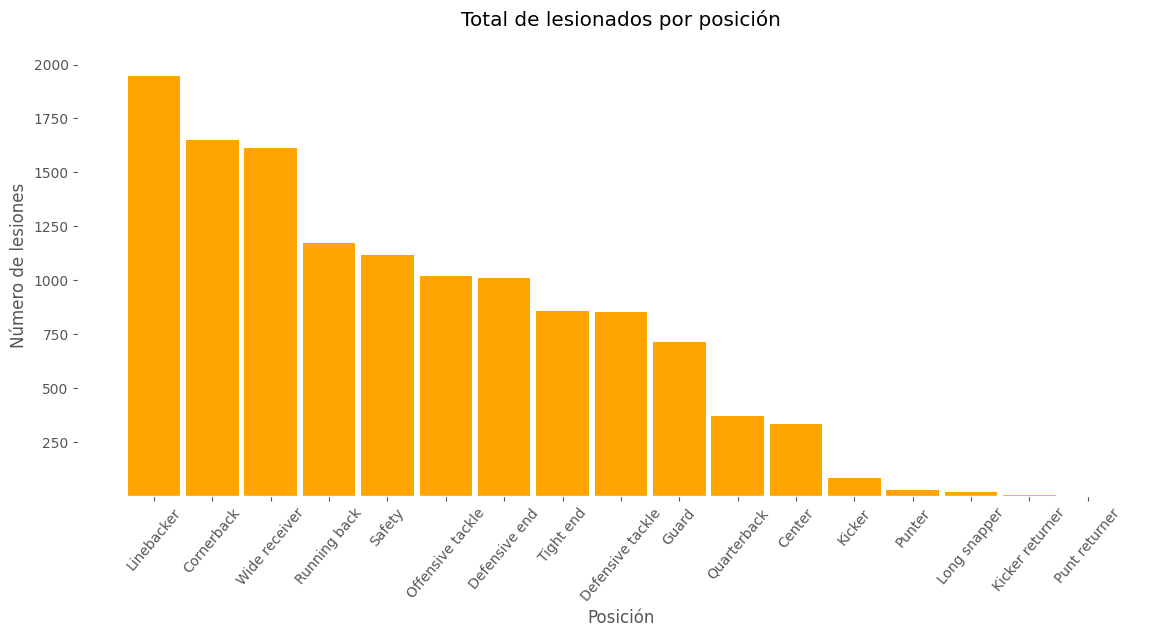

In [610]:
week_period = pd.crosstab(index=injuries.year, columns=injuries.position)

plt.style.use(['ggplot', {'axes.facecolor': 'white'}])

# Sumar el número de lesiones por posición
total_injuries_by_position = week_period.sum(axis=0)

# ordenamos de mayor a menor los más lesionados
most_injured_position = total_injuries_by_position.sort_values(ascending=False).index[0]

print(f"La posición que más se lesiona es {most_injured_position}")

# ordenamos la serie
total_injuries_by_position_sorted = total_injuries_by_position.sort_values(ascending=False)
plt.figure(figsize=(14, 6))

# Visualizamos
plt.bar(total_injuries_by_position_sorted.index, total_injuries_by_position_sorted, width=0.9, color='orange')
plt.xlabel('Posición')
plt.ylabel('Número de lesiones')
plt.title("Total de lesionados por posición")
plt.ylim(0.5, total_injuries_by_position_sorted.max()*1.1)
plt.xticks(rotation=50);


> ## 3. ¿Quienes son los jugadores que más se han lesionado?

Nombre:          Nº veces
Eddie Royal         33
Louis Delmas        31
Jordan Reed         27
Marcus Gilbert      26
A.J. Green          25
Cordy Glenn         25
Terron Armstead     24
Sean Lee            24
Morris Claiborne    24
Peyton Manning      22
Name: player, dtype: int64


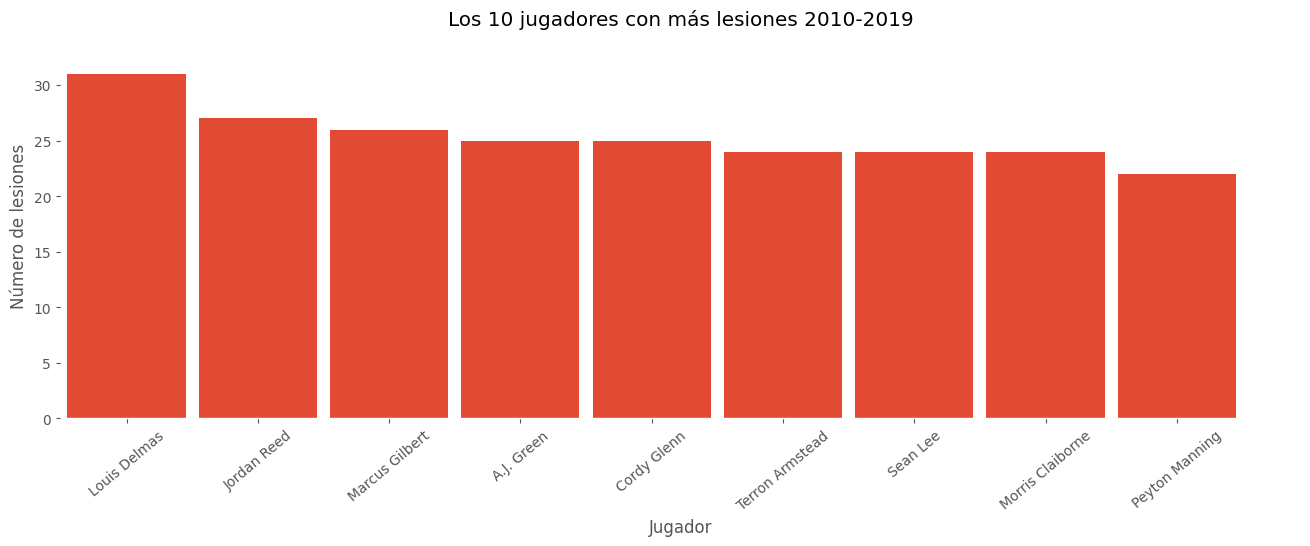

In [611]:
plt.style.use(['ggplot', {'axes.facecolor': 'white'}])

# Conteo de lesiones
injuries_by_player = injuries['player'].value_counts()

# 10 judores con más lesiones
top_10_injured_players = injuries_by_player.head(10)
print(f"Nombre:          Nº veces\n{top_10_injured_players}")

# Visualización
plt.figure(figsize=(16,5))
plt.bar(top_10_injured_players.index, top_10_injured_players, width=0.9)
plt.xlabel('Jugador')
plt.ylabel('Número de lesiones')
plt.title('Los 10 jugadores con más lesiones 2010-2019')
plt.xlim(0.5)
plt.xticks(rotation=40);

> ## 4. ¿Cuáles son las lesiones más habituales?

In [612]:
#Filtramos el top 10 de lesiones
frequency = injuries["injury"].value_counts().head(10)

#Creamos dataframe y reseteamos el índice
df_frequency = pd.DataFrame({"injury_type": frequency.index, "frequency": frequency.values})
df_frequency.reset_index(drop=True, inplace=True)
df_frequency

,injury_type,frequency
0,Knee,2376
1,Ankle,1905
2,Hamstring,1616
3,Concussion,964
4,Foot,828
5,Shoulder,692
6,Groin,585
7,Calf,450
8,Back,427
9,Illness,351


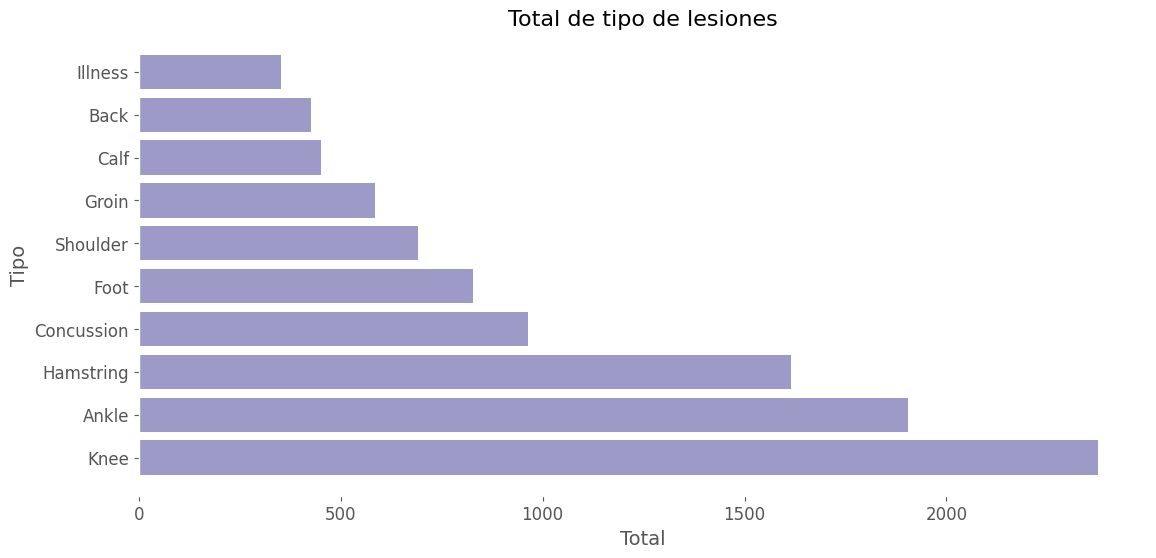

In [613]:
colors = sns.color_palette("Purples",1)

# Visualizamos
fig, ax = plt.subplots(figsize=(13,6))
ax.barh(df_frequency["injury_type"], df_frequency["frequency"], color=colors)

# Configuramos los ejes y etiquetas
ax.set_xlabel("Total", fontsize=14)
ax.set_ylabel("Tipo", fontsize=14, )
ax.set_title("Total de tipo de lesiones", fontsize=16)

# Configuramos los ticks y la grilla
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--');

> ## 5. ¿Cuál es el equipo que más lesiones ha tenido?

In [614]:
#Filtramos el top 10 por equipos
team = injuries["team"].value_counts().head(10)

#Creamos dataframe y reseteamos el índice
team_df = pd.DataFrame({"team": team.index, "frequency": team.values})
team_df.reset_index(drop=True, inplace=True)
team_df

,team,frequency
0,IND,652
1,SEA,512
2,GB,511
3,DAL,503
4,NYG,484
5,CIN,464
6,LAC,459
7,LV,457
8,JAX,433
9,CAR,426


El equipo que más lesionados tiene son los Indianapolis Colts 


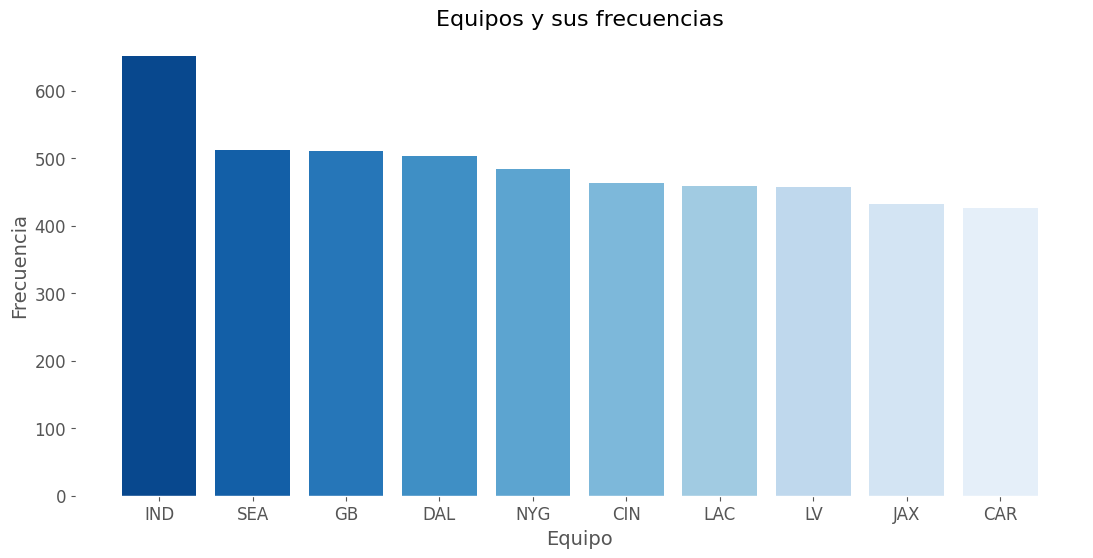

In [615]:
colors = sns.color_palette("Blues_r", 10)

# DataFrame de mayor a menor según la frecuencia
team_df = team_df.sort_values(by="frequency", ascending=False)

# Visualizamos
fig, ax = plt.subplots(figsize=(13,6))
ax.bar(team_df["team"], team_df["frequency"], color=colors)

# Configuramo los ejes y etiquetas
ax.set_xlabel("Equipo", fontsize=14)
ax.set_ylabel("Frecuencia", fontsize=14, )
ax.set_title("Equipos y sus frecuencias", fontsize=16)

# Configuramos los ticks y la grilla
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='x', linestyle='--')
print(f"El equipo que más lesionados tiene son los Indianapolis Colts ")

> ## 6. ¿Ataque, defensa o equipos especiales, quién se lesiona más?.

In [616]:
def category(position):
    if position in ["Quarterback",
                    "Wide receiver",
                    "Guard",
                    "Running back",
                    "Offensive tackle",
                    "Tight end",
                    "Center"
                    ]:
        return 'Offense'
    elif position in ["Defensive end",
                      "Linebacker",
                      "Cornerback",
                      "Safety",
                      "Defensive tackle"]:
        return 'Defense'
    else:
        return "Special teams"

# Utilizamos la funcion creada para filtrar y agregar nueva columna
injuries['category'] = injuries['position'].apply(category)
# vemos nuestro dataset
injuries.head(1)

,year,season,team,week,position,player,injury,report_status,practice_status,category
0,2010,REG,ARI,1,Running back,Chris Wells,Knee,Questionable,Did Not Participate In Practice,Offense


In [617]:
offense_defense = pd.crosstab(index = injuries.year, columns=injuries.category)
cross_offdef = np.array(offense_defense)

tot_off = offense_defense["Offense"].sum()
tot_def = offense_defense["Defense"].sum()
tot_spe_team = offense_defense["Special teams"].sum()

print(f"El número total lesiones en la ataque es de: {tot_off}")
print(f"El número total lesiones en la defensa es de: {tot_def}")
print(f"El número total lesiones en los equipos especiales es de: {tot_spe_team}")

El número total lesiones en la ataque es de: 6091
El número total lesiones en la defensa es de: 6581
El número total lesiones en los equipos especiales es de: 139


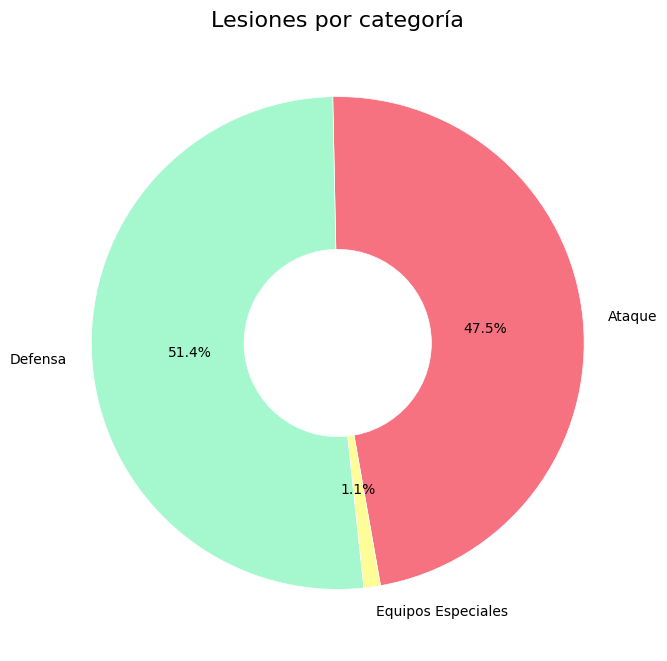

In [618]:
# Colores
colors = ["#F67280", "#A5F8CE", "#FEFD97"]

# Visualizacion
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie([tot_off, tot_def, tot_spe_team], labels=["Ataque", "Defensa", "Equipos Especiales"], autopct='%1.1f%%', startangle=-80, colors=colors, wedgeprops=dict(width=0.8, edgecolor='w'))
circle = plt.Circle((0,0), 0.38, color='w')
fig.gca().add_artist(circle)
ax.set_title("Lesiones por categoría", fontsize=16);


> ## 7. ¿La categoria del jugador está relacionado con el tipo de lesión?

- H0: no hay una relación significativa entre las variables

- H1: hay una relación significativa entre las variables

In [619]:
cat_injury = pd.crosstab(index = injuries.category, columns=injuries["practice_status"])
cross_cat = np.array(cat_injury)

In [620]:
estadistico, p_valor, grados_libertad, esperados = chi2_contingency(cat_injury)

# Mostramos los resultados
print("Estadístico chi-cuadrado:", estadistico)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)
print("Tabla de frecuencias esperadas:\n", esperados)

Estadístico chi-cuadrado: 28.517279785109455
Valor p: 6.420241657853111e-07
Grados de libertad: 2
Tabla de frecuencias esperadas:
 [[6227.06127547  353.93872453]
 [5763.41440949  327.58559051]
 [ 131.52431504    7.47568496]]


In [621]:
# Seleccionamos el grado de significancia
alpha = 0.05

# Evaluación de p-valor en función del nivel de significación elegido
if p_valor < alpha:
    print("Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")


Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.


> ## 8. ¿Cual ha sido, en estos 10 años, el jugador con más lesiones?

In [622]:
#jugador con más lesiones
top_injuried = injuries[['player', "position"]].value_counts()

# Conteo el número de lesiones por jugador
injuries_by_player = injuries['player'].value_counts()

# jugador con el número máximo de lesiones
most_injured_player = injuries_by_player.idxmax()

print(f"El jugador que más se ha lesionado es {most_injured_player}. Ha estado casi 2 años fuera del terreno de juego")
print(f"Aunque la posición de Linebacker es la más afectada por las lesionas, podemos ver claramente que no están dentro del top 5 de los más lesionados")

print(f"{top_injuried.head(10)}")

El jugador que más se ha lesionado es Eddie Royal. Ha estado casi 2 años fuera del terreno de juego
Aunque la posición de Linebacker es la más afectada por las lesionas, podemos ver claramente que no están dentro del top 5 de los más lesionados
player            position        
Eddie Royal       Wide receiver       33
Louis Delmas      Safety              31
Jordan Reed       Tight end           27
Marcus Gilbert    Offensive tackle    26
Cordy Glenn       Offensive tackle    25
A.J. Green        Wide receiver       25
Terron Armstead   Offensive tackle    24
Sean Lee          Linebacker          24
Morris Claiborne  Cornerback          24
King Dunlap       Offensive tackle    22
dtype: int64


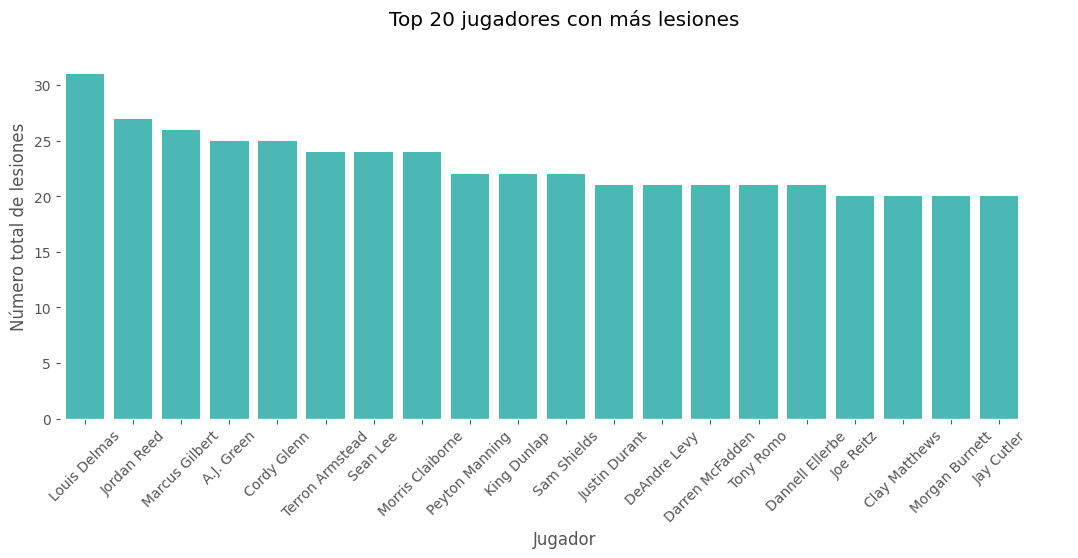

In [623]:
# Conteo el número de lesiones por jugador
injuries_by_player = injuries['player'].value_counts()

# Los 20 con más lesiones
top_20_injured_players = injuries_by_player.head(21)

# Hacemos una visualización
plt.figure(figsize=(13,5))
plt.bar(top_20_injured_players.index, top_20_injured_players, width=0.8, color='#4CB8B4')
plt.xlabel('Jugador')
plt.ylabel('Número total de lesiones')
plt.title('Top 20 jugadores con más lesiones')
plt.xlim(0.5)
plt.xticks(rotation=45);

> ## 9. ¿Dentro del ranking lesivo hay estrellas que han estado dentro de los top 100 NFL?

In [624]:
top_100_injured_players = injuries['player'].value_counts()
top_100_injured_players = top_100_injured_players.to_frame().head(100)

# Hacemos un reset para tener nuevo indice generar una columna llamada "player"
top_100_injured_players.reset_index(inplace=True)

# renombramos nuestras columnas
top_100_injured_players.rename(columns={"index":"player", "player":"times"}, inplace=True)

#Hacemos una máscara para averiguar si exiten coincidencias
mascara = ranks_nfl['player'].isin(top_100_injured_players['player'])

# Numero de veces han coincido que un jugador ha estado dentro del top 100
injury_top = mascara.sum()

print(f"Han aparecido un total de: {injury_top} jugadores")

Han aparecido un total de: 126 jugadores


> ## 10. ¿Existe relación entre las lesiones del ataque y las lesiones de la defensa semanalmente?

**Hipótesis nula y alternativa:**

- H0: no hay una relación significativa entre las variables

- H1: hay una relación significativa entre las variables

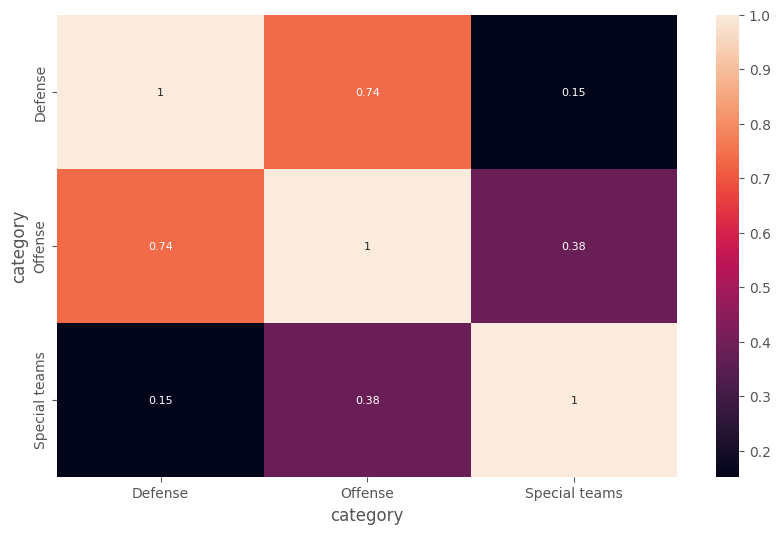

In [625]:
off_def_cross = pd.crosstab(index=injuries.week, columns=injuries.category)

corr_xyz = off_def_cross.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_xyz, annot=True, annot_kws={"size": 8});

In [626]:
from scipy import stats
from scipy.stats import chi2_contingency
correlacion_mega = pd.crosstab(index=injuries.week, columns=injuries.category)

chi2, p, dof, expected = stats.chi2_contingency(correlacion_mega)

print("Estadístico chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Tabla de frecuencias esperadas:\n", expected)


Estadístico chi-cuadrado: 41.72624712283418
Valor p: 0.11658775689761067
Grados de libertad: 32
Tabla de frecuencias esperadas:
 [[279.45234564 258.64522676   5.9024276 ]
 [363.69900866 336.61915541   7.68183592]
 [436.1305909  403.65771603   9.21169308]
 [424.31551011 392.72234798   8.96214191]
 [431.50729842 399.37865896   9.11404262]
 [408.90453517 378.45882445   8.63664039]
 [408.90453517 378.45882445   8.63664039]
 [367.80860198 340.42276169   7.76863633]
 [355.99352119 329.48739365   7.51908516]
 [358.56201702 331.86464757   7.57333541]
 [371.40449614 343.75091718   7.84458668]
 [400.17164936 370.37616111   8.45218952]
 [413.01412848 382.26243072   8.72344079]
 [407.87713684 377.50792288   8.61494029]
 [399.6579502  369.90071033   8.44133947]
 [350.34283038 324.25743502   7.3997346 ]
 [403.25384435 373.22886582   8.51728983]]


In [627]:
# Seleccionamos el grado de significancia
alpha = 0.05

# Evaluación de p-valor en función del nivel de significación elegido
if p_valor < alpha:
    print("Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")

Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.


> ## 11. ¿Cual es la relación entre el éxito y las lesiones de la carrera de un jugador?

In [628]:
# Numero de veces ha estado lesionado
injuries[injuries["player"]=="Peyton Manning"]

,year,season,team,week,position,player,injury,report_status,practice_status,category
1326,2011,REG,IND,1,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense
1401,2011,REG,IND,2,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense
1485,2011,REG,IND,3,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense
1582,2011,REG,IND,4,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense
1667,2011,REG,IND,5,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense
1757,2011,REG,IND,6,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense
1834,2011,REG,IND,7,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense
1910,2011,REG,IND,8,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense
1975,2011,REG,IND,9,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense
2059,2011,REG,IND,10,Quarterback,Peyton Manning,Neck,Out,Out (Definitely Will Not Play),Offense


In [554]:
# numero de veces en los rankings nfl de Peyton manning
Manning = ranks_nfl[ranks_nfl["player"]=="Peyton Manning"]
print("A pesar de haber estado más de 1 año lesionado consiguió volver y entrar en el top 5 de jugadores 3 años, claro ejemplo de superación y éxito")

A pesar de haber estado más de 1 año lesionado consiguió volver y entrar en el top 5 de jugadores 3 años, claro ejemplo de superación y éxito


### <a id='14'>**6.1 Resumen**</a>

> ## 1. ¿En qué epoca del año los jugadores se lesionan más?
-   La semana con mayor número de lesiones es: 3.0, con un total de: 849 lesiones

> ## 2. ¿Cuál es la posición más lesiva?
-   La posición que más se lesiona es Linebacker

> ## 3. ¿Quienes son los jugadores que más se han lesionado?
-   Eddie Royal con 33
-   Louis Delmas con 31
-   Jordan Reed con 27
-   Marcus Gilbert con 26
-   A.J. Green con 25
-   Cordy Glenn con 25
-   Terron Armstead con 24
-   Sean Lee con 24
-   Morris Claiborne con 24
    Peyton Manning con 22

> ## 4. ¿Cuáles son las lesiones más habituales?
-   Knee con 2376
-   Ankle con 1905 
-   Back con 427
-   Calf con 450
-   Concussion con 964
-   Foot con 828

> ## 5. ¿Cuáles son los equipos que más lesiones ha tenido?

-   Indianapolis con 652
-   Seattle con 512
-   Green Bay   511
-   Dallas con 503
-   New York con 484
-   Cincinnati con 464
-   Los Angeles con 459
-   Las Vegas con 457
-   Jacksonville con 433
-   Carolina   con 426
 
> ## 6. ¿Ataque, defensa o equipos especiales, quién se lesiona más?.

-   Ofensiva con 6091
-   Defensiva con  6581
-   Equipos especiales  con 139

> # 7. ¿La categoria del jugador está relacionado con el tipo de lesión?

- H0: no hay una relación significativa entre las variables

- H1: hay una relación significativa entre las variables

    -   Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.

> ## 8. ¿Cual ha sido, en estos 10 años, el jugador con más lesiones?

-   El jugador que más se ha lesionado es Eddie Royal. Ha estado casi 2 años fuera del terreno de juego
Aunque la posición de Linebacker es la más afectada por las lesionas, podemos ver claramente que no están dentro del top 5 de los más lesionados.

> ## 9. ¿Dentro del ranking lesivo hay estrellas que han estado dentro de los top 100 NFL?

-   El número de veces que dentro de los 100 más lesionados ha aparecido en el top 100 ranking es de: 126 en estos 10 años.


> # 10. ¿Existe relación entre las lesiones del ataque y la defensa semanalmente?

**Hipótesis nula y alternativa:**

- H0: no hay una relación significativa entre las variables

- H1: hay una relación significativa entre las variables

    -   No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.

> ## 11. ¿Cual es la relación entre el éxito y las lesiones de la carrera de un jugador?

-   A pesar de haber estado más de 1 año lesionado consiguió volver y entrar en el top 5 de jugadores 3 años, claro ejemplo de superación y éxito.

    -   2010: nº. 2
    -   2011: nº. 50
    -   2012: nº. 2
    -   2013: nº. 1
    -   2014: nº. 5

## <a id='15'>**7. Conclusiones**</a>
Una vez analizado todos los datos. Nos hemos podido responder a distintas hipótesis. A partir de aquí sería interesante investigar sobre qué hace la NFL para prevenir estas lesiones y cuidar a los jugadores.

## <a href ='#0'> 🔝 To the moon 🔝 </a>